##### Ising simulator modified from https://github.com/bdhammel/ising-model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a square 2D Ising Lattice 
# Initial magnetization state of the elements in the lattice is uniform (u) or randomized (r)

class IsingLattice:

    def __init__(self, temperature, initial_state, size, J, h):
        self.size = size # size of each dimension
        self.T = temperature 
        self.J = J
        self.h = h
        self.system = self._build_system(initial_state)

    @property
    def sqr_size(self):
        return (self.size, self.size)

    def _build_system(self, initial_state):
        """Build the system

        Build either a randomly distributed system or a homogeneous system (for
        watching the deterioration of magnetization

        Parameters
        ----------
        initial_state : str: "r" for random or "u" for uniform (all +1)
            Initial state of the lattice. 
        """

        if initial_state == 'r':
            system = np.random.choice([-1, 1], self.sqr_size)
        elif initial_state == 'u':
            system = np.ones(self.sqr_size)
        else:
            raise ValueError(
                "Initial State must be 'r', random, or 'u', uniform"
            )

        return system
    
    def _bc(self, i):
        """Apply periodic boundary condition

        Check if a lattice site coordinate falls out of bounds. If it does,
        apply periodic boundary condition

        Assumes lattice is square

        Parameters
        ----------
        i : int
            lattice site coordinate

        Return
        ------
        int
            corrected lattice site coordinate
        """
        if i >= self.size:
            return 0
        if i < 0:
            return self.size - 1
        else:
            return i

    def energy(self, N, M):
        """Calculate the energy of spin interaction at a given lattice site
        i.e. the interaction of a Spin at lattice site n,m with its 4 neighbors

        - S_n,m*(S_n+1,m + Sn-1,m + S_n,m-1, + S_n,m+1)

        Parameters
        ----------
        N : int
            lattice site coordinate
        M : int
            lattice site coordinate

        Return
        ------
        float
            energy of the site
        """
        return -self.system[N, M]*(
            self.system[self._bc(N - 1), M] + self.system[self._bc(N + 1), M]
            + self.system[N, self._bc(M - 1)] + self.system[N, self._bc(M + 1)]
        )
    
    @property
    def internal_energy(self):
        e = 0
        E = 0
        E_2 = 0

        for i in range(self.size):
            for j in range(self.size):
                e = self.energy(i, j)
                E += e
                E_2 += e**2

        U = (1./self.size**2)*E
        U_2 = (1./self.size**2)*E_2

        return U, U_2

    @property
    def heat_capacity(self):
        U, U_2 = self.internal_energy
        return U_2 - U**2

    @property
    def magnetization(self):
        """Find the overall magnetization of the system
        """
        return np.abs(np.sum(self.system)/self.size**2)
    

def run(lattice, epochs = 100):
    """Run the simulation
    """
    System = []
    Magnetization = []
    Heat_Capacity = []


    for epoch in range(epochs):
        # Randomly select a site on the lattice
        N, M = np.random.randint(0, lattice.size, 2)

        # Calculate energy of a flipped spin
        dE = -2*lattice.energy(N, M)

        # "Roll the dice" to see if the spin is flipped
        if dE <= 0.:
            lattice.system[N, M] *= -1
        elif np.exp(-dE/lattice.T) > np.random.rand():
            lattice.system[N, M] *= -1

        System.append(lattice.system)
        Magnetization.append(lattice.magnetization)
        Heat_Capacity.append(lattice.heat_capacity)

    return System, Magnetization, Heat_Capacity


            

            

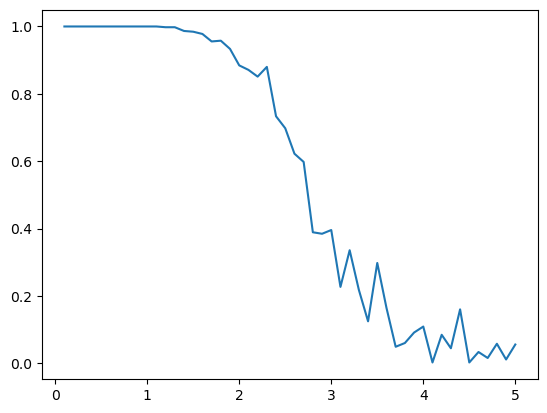

In [4]:
final_mags=[]
temps = np.linspace(0.10,5,50)


for temp in temps:
    test = IsingLattice(temp,'u',30)
    System, Magnetization, Heat_Capacity = run(test,epochs=10000)
    final_mags.append(Magnetization[-1])

plt.plot(temps,final_mags);